# Segmentation Methods In Heart Sound Recordings

### Libraries Needed

In this notebook we used the libraries listed bellow:

In [1]:
import os
import numpy as np
import sounddevice as sd
import ppfunctions_1 as ppf
import scipy.io.wavfile as wf

import matplotlib.pyplot as plt

## Signal Loading Process
We uses the **os** librarie to import the **.wav** files containing the heart sounds recordings.

In [2]:
# Looking for heart sounds data absolute path 
l1=os.path.abspath('Data Base HS\\training\\training-a\\a0011.wav')
l1=l1.replace('\\','/')
l2=os.path.abspath('Data Base HS\\training\\training-a\\a0003.wav')
l2=l2.replace('\\','/')
# reading file
Fs1, data1 = wf.read(l1)
Fs2, data2 = wf.read(l2)
# Clear paths
del l1, l2

## Pre-Processing: Audio-Signal Basic Information (SBI)
This section is divided in two parts. The first ensure converting all files into a **Mono Sound** and a **Signal Resampling** process which ensure a sampling frequency of 2kHz. The second part gets the **signal basic information (SBI)** which are the time duration of the recording (dt) and a vector time (vt).

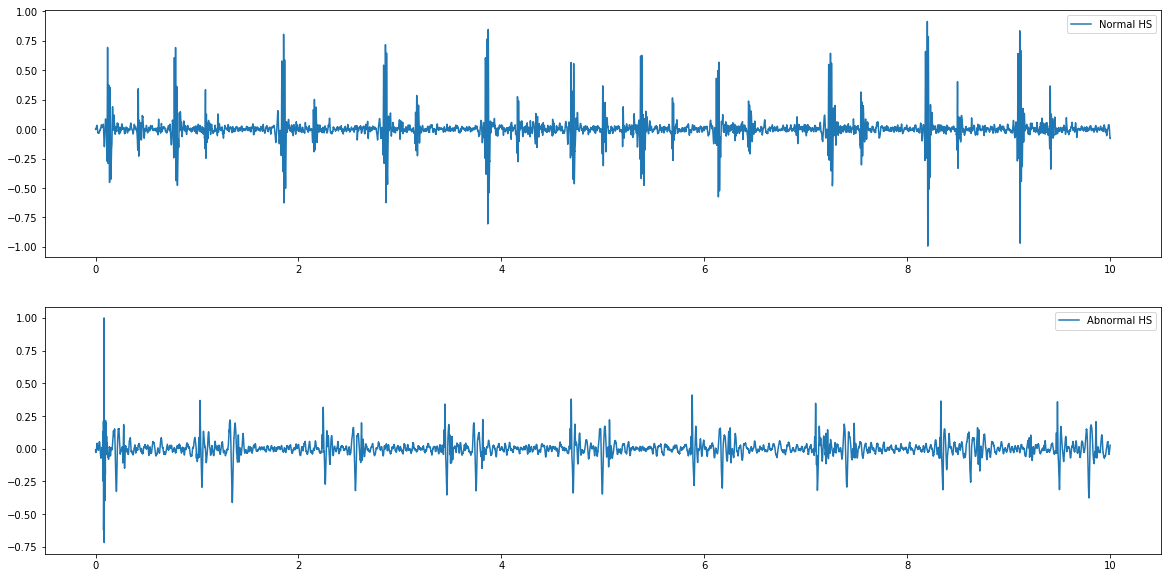

In [3]:
# Audio Pre-processing
data1, Fs1 = ppf.pre_pro_audio_PCG(data1, Fs1)
data2, Fs2 = ppf.pre_pro_audio_PCG(data2, Fs2)
# Signal basic information
dt1, vt1 = ppf.pre_pro_basicInfo_PCG(data1, Fs1)
dt2, vt2 = ppf.pre_pro_basicInfo_PCG(data2, Fs2)
# To show just ten seconds of the signal
idx1 = (np.abs(vt1-10)).argmin()
idx2 = (np.abs(vt2-10)).argmin()

plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2,1,1)
plt.plot(vt1[0:idx1], data1[0:idx1], label = "Normal HS")
plt.legend()
plt.subplot(2,1,2)
plt.plot(vt2[0:idx2], data2[0:idx2], label = "Abnormal HS")
plt.legend()
plt.show()

## Segmentation: Running Sum- Derivative Algorithm

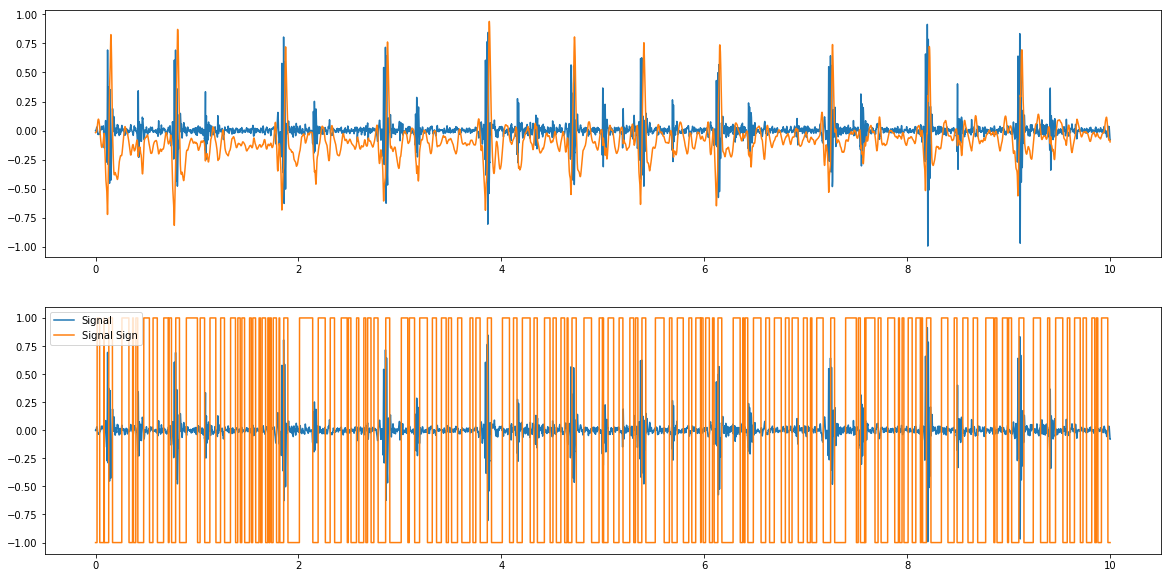

In [4]:
# 1. Apply Running Sum algorithm to the PCG signal.
data1_ = ppf.running_sum(data1)                      # Appliying Running Sum Algorithm
# 2. Smooth the PCG signal 
F_data1 = ppf.butter_bp_fil(data1_, 0.01,2.5, Fs1)   # Smooth the signal
# 3. Apply first derivative to the smoothed signal
xx= ppf.derivate_1(F_data1)                          # Apply the first derivative
# 4. Smooth the signal again
xx = ppf.butter_bp_fil(xx, 0.01,2.5, Fs1)            # Smooth the signal 
# 5. Converts all negatives into -1 & all positives to +1
xxS = np.sign(xx)                                    # Transforms negatives in -1, positives +1
# ------------------------------------------------------------------------
plt.subplot(2,1,1)
plt.plot(vt1[0:idx1], data1[0:idx1], label='Signal')
plt.plot(vt1[0:idx1], F_data1[0:idx1], label='Running Sum Algorithm')
plt.subplot(2,1,2)
plt.plot(vt1[0:idx1], data1[0:idx1], label='Signal')
plt.plot(vt1[0:idx1], xxS[0:idx1], label='Signal Sign')
plt.legend()

## Segmentation: Running Sum Algorithm + Scipy Peak_detector

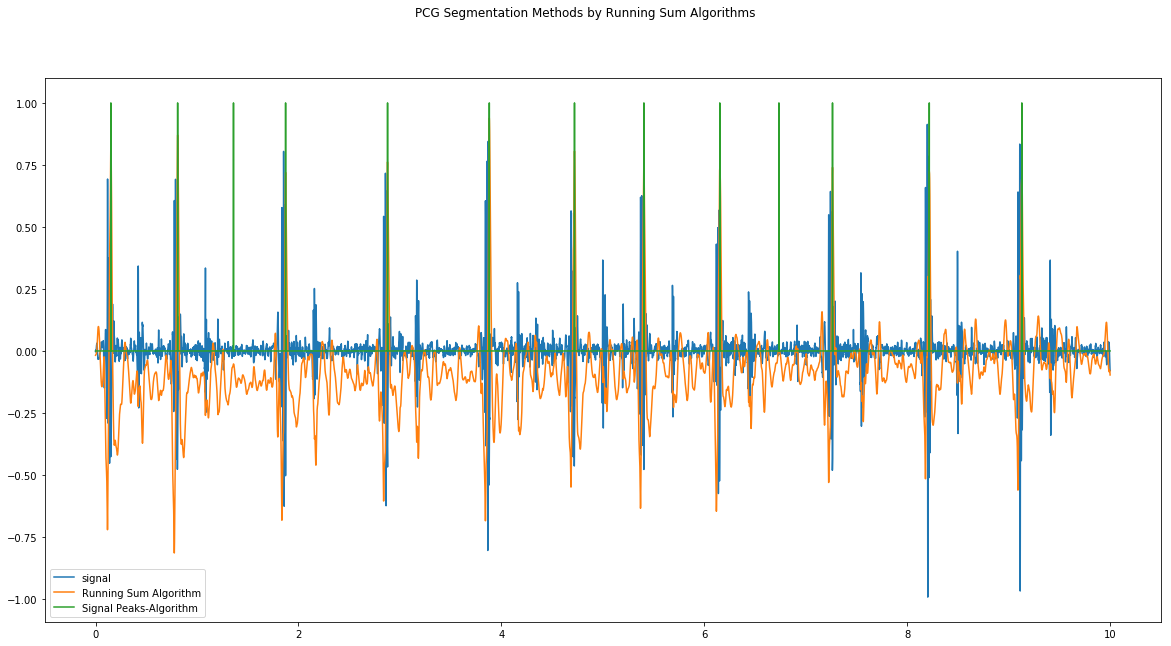

In [5]:

from scipy.signal import find_peaks

time_samples = 0.5                               # Time to be represented in samples
mC = int(time_samples * Fs1)                     # Number of samples to move over the signal 
re = np.zeros(len(F_data1))
p = find_peaks(F_data1, distance=mC)

for i in range (len(p[0][:])):
    re[p[0][i]] = 1

plt.suptitle('PCG Segmentation Methods by Running Sum Algorithms')
plt.plot(vt1[0:idx1], data1[0:idx1], label ='signal')
plt.plot(vt1[0:idx1], F_data1[0:idx1], label ='Running Sum Algorithm')
plt.plot(vt1[0:idx1], re[0:idx1], label ='Signal Peaks-Algorithm')
plt.legend()